1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

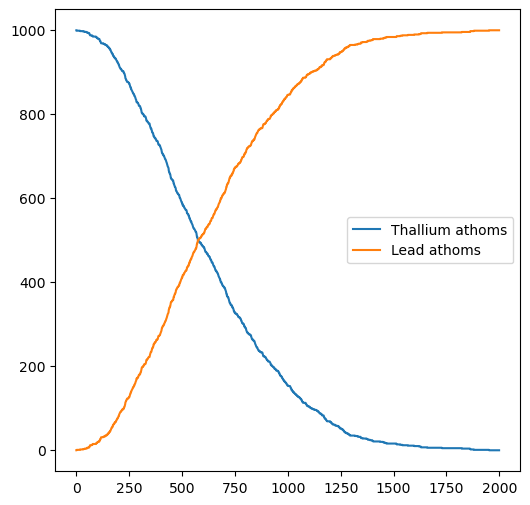

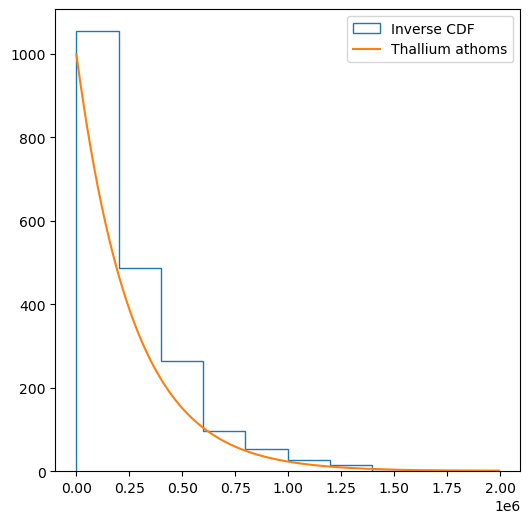

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Convert Tau to seconds
tau = 3052*60 

# Observed time
obs_time = 2000
time_wind = np.arange(obs_time)

# Starting number of Thallium atoms and Lead athoms
tl = [1000]
pb = [0]

# Define function for probability distribution
def decay_prob(t):
    return 1 - 2**(-t/tau)

# Calculate the number of Tl and Pb atoms as a function of time using the decay probability.
for t in range(1, obs_time):

    prob_t = decay_prob(t) # Probability of decay for the current time step
    n_atoms = np.random.random(tl[t-1]) # Generate the number of Tl atoms decaying for the current time step
    n_atoms_decayed = np.sum(n_atoms < prob_t)  
    tl.append(tl[t-1] - n_atoms_decayed) # Updates the number of Tl atoms remaining after decay
    pb.append(pb[t-1] + n_atoms_decayed) # updates the number of Pb atoms
    

plt.figure(figsize=(6, 6))
plt.plot(time_wind, tl)
plt.plot(time_wind, pb)
plt.legend(["Thallium athoms", "Lead athoms"])
plt.show()

def decay_prob_2(x):
    return pow(2,(-x/tau))*np.log(2)/tau

# By calculating the CDF of the dentisity probability given (p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}), and inverting it, we obtain:
def inverse_cdf(x):
    return -tau*np.log2(1 - x)

# Generate the decay times of Tl atoms
uniform_num = np.random.random(obs_time)
x = inverse_cdf(uniform_num)

plt.figure(figsize=(6, 6))
plt.hist(x, histtype = 'step')
plt.plot(np.sort(x), (1 - (np.sort(uniform_num)))*1000)
plt.legend(["Inverse CDF", "Thallium athoms"])
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

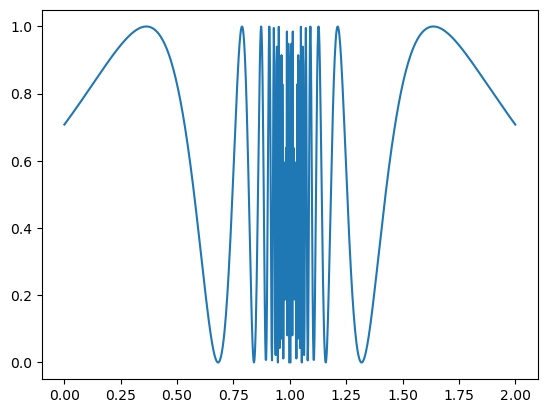

Result of the integral of f(x) with hit and miss method:
Mean (hit/miss):  1.3420000000000007
Standard Deviation (hit/miss):  6.661338147750939e-17

Result of the integral of f(x) with mean value method: 1.3496694709515145


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(1/(1-x))**2

# Plot the function
x = np.linspace(0, 2, 1000)
y = f(x)
plt.plot(x, y)
plt.show()

# Hit and miss method
N = 10000
n_rep = 100
x_rand = np.random.uniform(0, 2, N)
y_rand = np.random.uniform(0, 1, N)

integral = []

# Count the number of points that fall under the curve

for i in range (n_rep):
    count = 0
    for j in range(N):
        if y_rand[j] <= f(x_rand[j]):
            count += 1
    # Estimate the integral
    integral.append((2 - 0) * (count / N))


# Mean and standard deviation from the obtained list
mean = np.mean(integral)
std = np.std(integral)/np.sqrt(n_rep)
print("Result of the integral of f(x) with hit and miss method:")
print("Mean (hit/miss): ", mean)
print("Standard Deviation (hit/miss): ", std)

# Mean value method
x_rand = np.random.uniform(0, 2, N)
y_rand = f(x_rand)
integral = (2 - 0) * (np.mean(y_rand))
print("\nResult of the integral of f(x) with mean value method:", integral)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
def integral(dimention):
    # Generate N random points with coordinates between -1 and 1, centered in 0
    x = np.random.uniform(low = -1, high = 1, size = (dimention, N)) 
    # The function (x^2) is calculated for each point and it's verified if the point falls within the region of interest
    f = np.sum(x**2, axis = 0) <= 1
    # The number of points that fall within the region of interest is multiplied by 2^dimention 
    # to obtain the area or volume of the region of interest.
    # Then the value is then divided by N to obtain an approximate value.
    return 2**dimention*np.sum(f)/N

N = 100000

print("Area of unit circle: ", integral(2))
print("Volume of unit 10D sphere: ", integral(10))

Area of unit circle:  3.14736
Volume of unit 10D sphere:  2.60096


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [13]:
import random
import math
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return (x**(-1/2))/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

# Number of samples to use in the integration
N = 10000

# compute I_w with mean value method
v = np.random.random(N)
w_int = np.sum(w(v))/N

# Compute the integral with the importance sampling method
v1 = np.random.uniform(0, 1, N)**2
h_is = 1.0 / N * np.sum(f(v1) / w(v1)) * w_int

print("Integral result: ", h_is)
# the result is close to 0.84. The more samples you use, the more accurate the result will be.

Integral result:  0.8453671582742297
